<a href="https://colab.research.google.com/github/mesahwi/Birdsong_Continuity/blob/main/example_runs/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Code and data

In [1]:
!git clone https://github.com/mesahwi/Birdsong_Continuity.git

Cloning into 'Birdsong_Continuity'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 140 (delta 68), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (140/140), 218.35 KiB | 19.85 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [2]:
%cd Birdsong_Continuity

/content/Birdsong_Continuity


In [3]:
!bash load_results.sh

--2021-11-11 12:30:40--  https://docs.google.com/uc?export=download&confirm=&id=18YIPI5B-tQ5_Ded82eVBuSKZe8xmpnN3
Resolving docs.google.com (docs.google.com)... 172.217.1.206, 2607:f8b0:4004:814::200e
Connecting to docs.google.com (docs.google.com)|172.217.1.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-9o-docs.googleusercontent.com/docs/securesc/c17titphnbla4g40sbkbi9smfsj9ckpd/qfirdhk3cr21h9k8903k8qa38vvtb95s/1636633800000/15844907332939629602/15046752821311240377Z/18YIPI5B-tQ5_Ded82eVBuSKZe8xmpnN3?e=download [following]
--2021-11-11 12:30:41--  https://doc-0g-9o-docs.googleusercontent.com/docs/securesc/c17titphnbla4g40sbkbi9smfsj9ckpd/qfirdhk3cr21h9k8903k8qa38vvtb95s/1636633800000/15844907332939629602/15046752821311240377Z/18YIPI5B-tQ5_Ded82eVBuSKZe8xmpnN3?e=download
Resolving doc-0g-9o-docs.googleusercontent.com (doc-0g-9o-docs.googleusercontent.com)... 172.217.15.97, 2607:f8b0:4004:811::2001
Connecting to doc-0g-9o-do

In [4]:
!pip install pingouin &> /dev/null

In [5]:
import numpy as np
import pandas as pd
import os
from glob import glob

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

In [6]:
WHOLE_DIR = 'KNN_results/'
SEG_DIR = WHOLE_DIR+'segments/'

# Whole syllable analysis

In [7]:
whole = glob(WHOLE_DIR+'*.csv')
df_whole = pd.read_csv(whole[0], index_col=0)

In [8]:
whole_wilcoxon = pg.wilcoxon(df_whole['CNS_Rmins'], df_whole['RNS_Ravgs'], alternative='less')
whole_wilcoxon

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,16021.0,less,2.577802e-63,-0.80651,0.737431


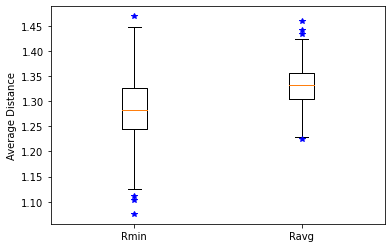

In [9]:
fig, ax = plt.subplots(1,1)
ax.boxplot([df_whole['CNS_Rmins'], df_whole['RNS_Ravgs']], sym="b*")

ax.set_ylabel('Average Distance')
plt.xticks([1, 2], 
           ['Rmin', 'Ravg']);

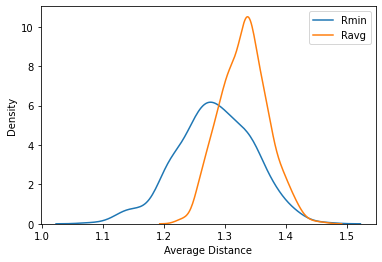

In [10]:
N = len(df_whole['CNS_Rmins'])

fig, ax = plt.subplots(1,1)
sns.kdeplot(df_whole['CNS_Rmins'], ax=ax, label='Rmin')
sns.kdeplot(df_whole['RNS_Ravgs'] , ax=ax, label='Ravg')

ax.legend()

ax.set_xlabel('Average Distance');

# Segment-wise analysis

In [11]:
## sorted file names (by time)
seg_file_names = glob(SEG_DIR+'*.csv')
seg_file_names = sorted(seg_file_names, key=lambda x:float(x.split(']')[-2].split(',')[-1][1:].split(' ')[0]))

In [12]:
df_list = []
for filename in tqdm(seg_file_names):
    df_list.append(pd.read_csv(filename, index_col=0))

  0%|          | 0/45 [00:00<?, ?it/s]

In [13]:
ws = []
num_sigs = 0
for i, df in enumerate(df_list):
    w = pg.wilcoxon(df['CNS_Rmins'], df['RNS_Ravgs'], alternative='less')
    ws.append(abs(w.RBC.values[0]))

    if w["p-val"].values[0] < 0.05:
        sig = True
        num_sigs += 1
    else:
        sig = False
    print(i, f'RBC : {abs(w.RBC.values[0])}, Significance : {sig}')

print('average RBC :', np.mean(ws), 'How many significant :', num_sigs)

0 RBC : 0.4378623188405797, Significance : True
1 RBC : 0.4946739130434783, Significance : True
2 RBC : 0.4998792270531401, Significance : True
3 RBC : 0.40707729468599035, Significance : True
4 RBC : 0.49847826086956526, Significance : True
5 RBC : 0.4740217391304348, Significance : True
6 RBC : 0.4979468599033816, Significance : True
7 RBC : 0.4815217391304348, Significance : True
8 RBC : 0.5755797101449276, Significance : True
9 RBC : 0.5413647342995169, Significance : True
10 RBC : 0.5627415458937197, Significance : True
11 RBC : 0.5896497584541063, Significance : True
12 RBC : 0.6065096618357488, Significance : True
13 RBC : 0.6622101449275362, Significance : True
14 RBC : 0.6330193236714976, Significance : True
15 RBC : 0.5571256038647343, Significance : True
16 RBC : 0.6202777777777777, Significance : True
17 RBC : 0.7470652173913044, Significance : True
18 RBC : 0.7858333333333334, Significance : True
19 RBC : 0.8518115942028985, Significance : True
20 RBC : 0.8565217391304347,

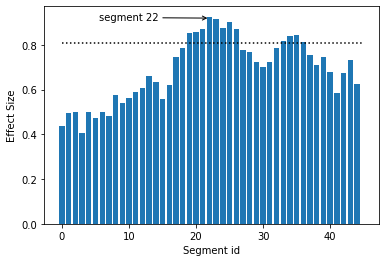

In [14]:
fig, ax = plt.subplots(1,1)
ax.set_ylabel('Effect Size')
ax.set_xlabel('Segment id')
ax.hlines(y=abs(whole_wilcoxon.RBC), xmin=0, xmax=45, linestyles='dotted')
ax.bar(x=np.arange(len(ws)), height=[abs(x) for x in ws])
ax.annotate('segment 22', ha = 'center', va = 'bottom',  xy=(22,0.92), xytext=(10,0.90),
            arrowprops = {'arrowstyle':"->",
                            'connectionstyle':"arc3"});

## Segment 22

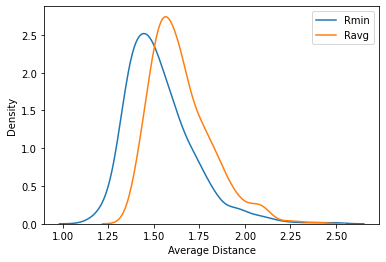

In [15]:
i = 22
N = len(df['CNS_Rmins'])

fig, ax = plt.subplots(1,1)
sns.kdeplot(df_list[i]['CNS_Rmins'], ax=ax, label='Rmin')
sns.kdeplot(df_list[i]['RNS_Ravgs'] , ax=ax, label='Ravg')
ax.legend()

ax.set_xlabel('Average Distance');

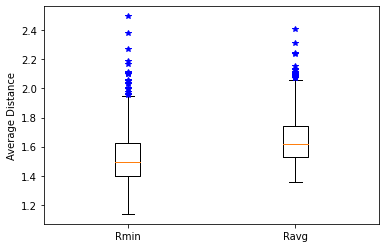

In [16]:
fig, ax = plt.subplots(1,1)
ax.boxplot([df_list[i]['CNS_Rmins'], df_list[i]['RNS_Ravgs']], sym="b*")
ax.set_ylabel('Average Distance')
plt.xticks([1, 2], 
           ['Rmin', 'Ravg']);